In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("cons_temp_1.csv")

In [3]:
df.head()

,datum,day_cons,temperature
0,2019-06-15,12.0,27.4
1,2019-06-16,11.0,22.6
2,2019-06-17,8.0,21.2
3,2019-06-18,6.0,23.2
4,2019-06-19,6.0,23.5


In [4]:
df["datum"] = pd.to_datetime(df["datum"])

In [5]:
df["shift"] = df["temperature"].shift(1)

In [6]:
df.dropna(inplace=True)

In [7]:
df["temp_change"] = df["temperature"] - df["shift"]

In [8]:
df.head()

,datum,day_cons,temperature,shift,temp_change
1,2019-06-16,11.0,22.6,27.4,-4.8
2,2019-06-17,8.0,21.2,22.6,-1.4
3,2019-06-18,6.0,23.2,21.2,2.0
4,2019-06-19,6.0,23.5,23.2,0.3
5,2019-06-20,8.0,22.1,23.5,-1.4


In [9]:
df.drop("shift",axis=1, inplace=True)

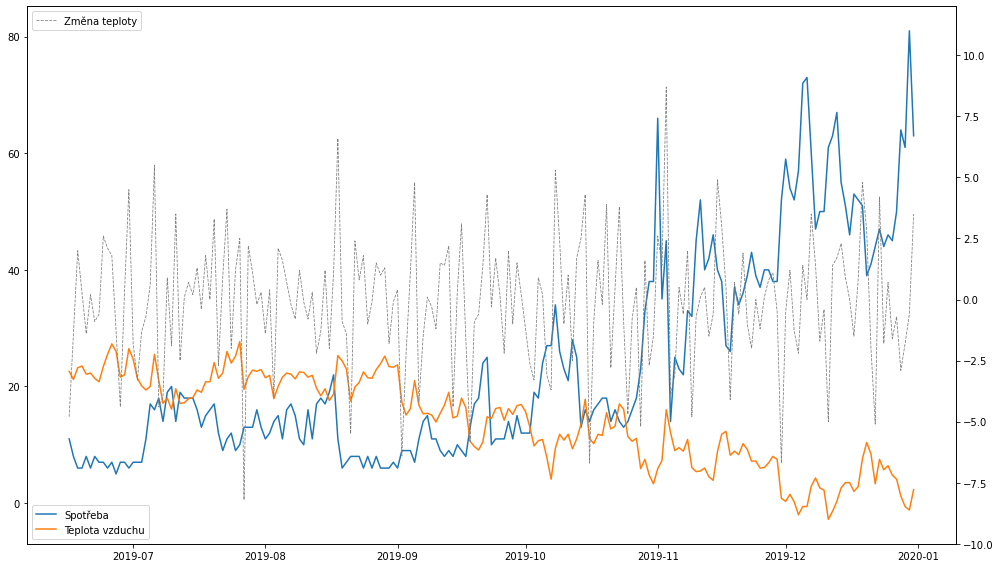

In [10]:
fig, ax = plt.subplots(figsize=(14,8))
ax.plot(df["datum"], df["day_cons"], label='Spotřeba')
ax.plot(df["datum"], df["temperature"], label='Teplota vzduchu')
ax2 = ax.twinx()
ax2.set_ylim(-10,12)
ax2.plot(df["datum"], df["temp_change"], color="gray", ls="--", lw=0.8, label='Změna teploty')
ax.legend(loc=3)
ax2.legend(loc=2)
plt.tight_layout()



In [11]:
df.corr()

,day_cons,temperature,temp_change
day_cons,1.000000,-0.875965,0.053490
temperature,-0.875965,1.000000,0.164517
temp_change,0.053490,0.164517,1.000000


Text(0.5, 1.0, 'Spotřeba v závoslosti na teplotě')

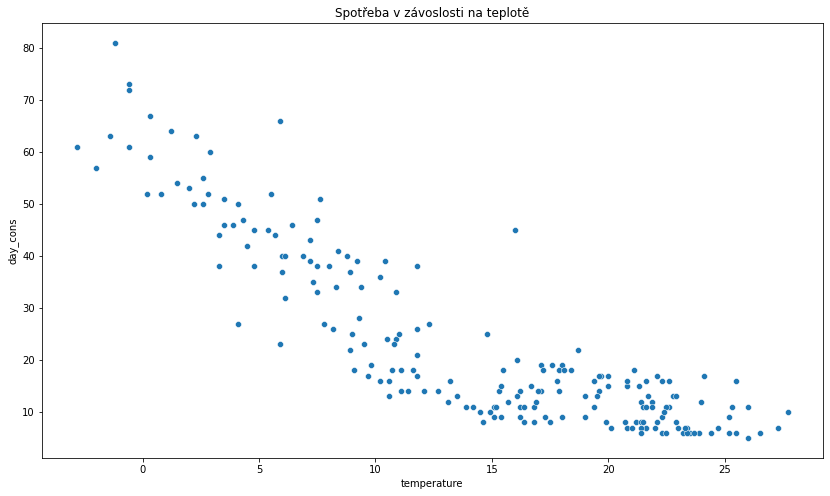

In [12]:
fig, ax = plt.subplots(figsize=(14,8))
ax= sns.scatterplot(data=df, x="temperature", y="day_cons")
plt.title("Spotřeba v závoslosti na teplotě")


In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

X_array = np.array(df["temperature"])

X = df["temperature"]
y= df["day_cons"]

X_array=X_array.reshape((-1,1))
evaluation = []

i=2
    
poly_converter = PolynomialFeatures(degree=i,include_bias=False)


poly_feat = poly_converter.fit_transform(X_array)



X_train, X_test, y_train, y_test = train_test_split(poly_feat, y, test_size=0.3, random_state=42)

X_train.shape

poly_model = LinearRegression()

poly_model.fit(X_train, y_train)

y_pred = poly_model.predict(X_test)

MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = MSE**(1/2)
metrics = [MAE,RMSE]
evaluation.append(metrics)

In [15]:
evaluation

[[5.510657371626844, 6.688026126643101]]

In [16]:
print (MAE, MSE**(1/2))

5.510657371626844 6.688026126643101


In [17]:
y_all = poly_model.predict(poly_feat)

In [18]:
y_all.shape, X.shape

((199,), (199,))

Text(0.5, 1.0, 'Polynomická regrese 2 řádu')

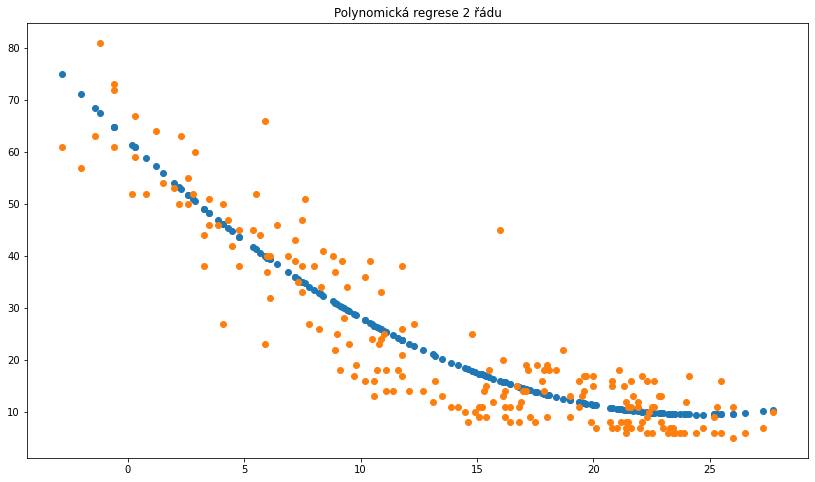

In [19]:
fig =plt.figure(figsize=(14,8))
plt.scatter(X,y_all)
plt.scatter(X, y)
plt.title("Polynomická regrese " + str(i) + " řádu")

In [20]:
res = y_all - y

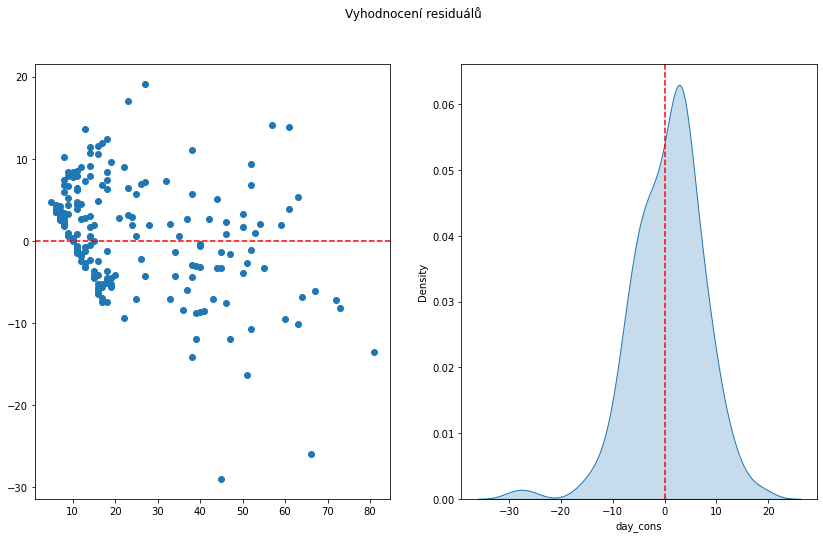

In [21]:
fig, ax = plt.subplots(figsize=(14,8),ncols=2,nrows=1)
ax[0].scatter(x=y, y=res)
ax[0].axhline(color="red", ls='--')
ax[1] = sns.kdeplot(x=res, shade=True)
ax[1].axvline(color="red", ls="--")
plt.suptitle("Vyhodnocení residuálů")
plt.show()

In [220]:
#2 dimensional features (temp a tem gradient)


In [22]:
df.head()

,datum,day_cons,temperature,temp_change
1,2019-06-16,11.0,22.6,-4.8
2,2019-06-17,8.0,21.2,-1.4
3,2019-06-18,6.0,23.2,2.0
4,2019-06-19,6.0,23.5,0.3
5,2019-06-20,8.0,22.1,-1.4


In [23]:
X= df.drop(["datum","day_cons"], axis=1)

In [270]:
# X = np.array(df["temperature"])
# X = X.reshape(-1,1)

In [24]:
y= df["day_cons"]

In [25]:
poly_converter = PolynomialFeatures(degree=2,include_bias=False)

In [26]:
poly_feat = poly_converter.fit_transform(X)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(poly_feat, y, test_size=0.3, random_state=42)

In [28]:
poly_model = LinearRegression()

In [29]:
poly_model.fit(X_train,y_train)

LinearRegression()

In [30]:
y_pred = poly_model.predict(X_test)

In [31]:
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = MSE**(1/2)

In [32]:
MAE, RMSE

(4.549407701354477, 5.434912049112761)

In [33]:
y_all = poly_model.predict(poly_feat)

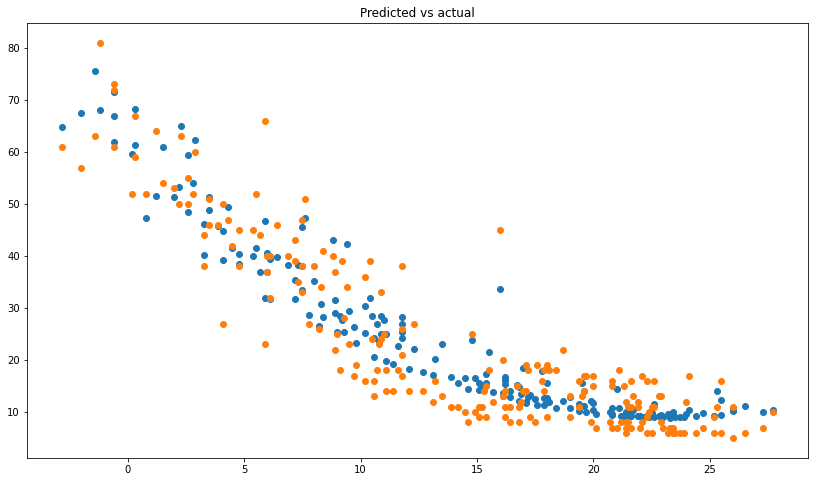

In [34]:
fig, ax = plt.subplots(figsize=(14,8))
ax.scatter(x=df["temperature"],y=y_all)
ax.scatter(x=df["temperature"],y=y)
plt.title("Predicted vs actual")
plt.show()

In [35]:
resid = y_all - y

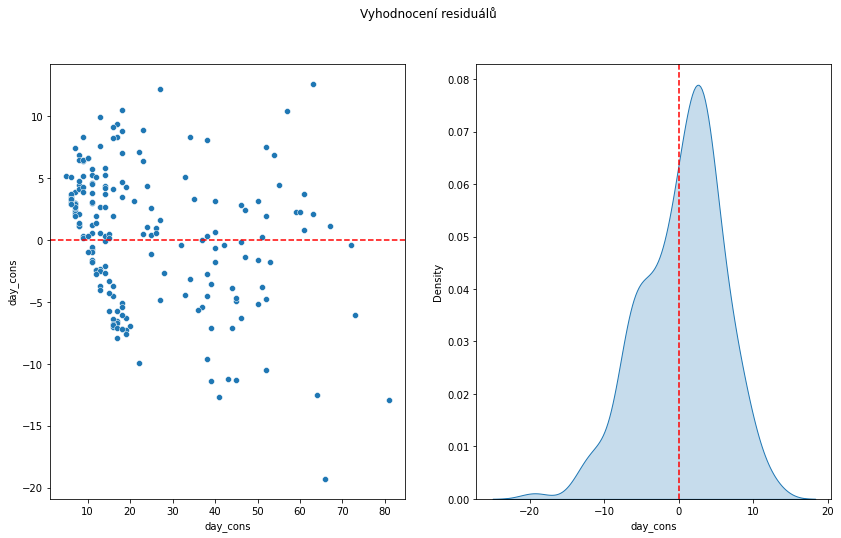

In [36]:
fig, ax = plt.subplots(figsize=(14,8),ncols=2,nrows=1)
sns.scatterplot(x=y, y=resid, ax = ax[0])
ax[0].axhline(color='red', ls="--")
sns.kdeplot(x=resid,shade=True,ax=ax[1])
ax[1].axvline(color = 'red', ls="--")
plt.suptitle("Vyhodnocení residuálů")
plt.show()

In [37]:
#Ridge regression


In [42]:
y.shape, poly_feat.shape

((199,), (199, 5))

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler = StandardScaler()

In [45]:
X_train, X_test, y_train, y_test = train_test_split(poly_feat, y, test_size=0.3, random_state=42)

In [46]:
scaler.fit(X_train)

StandardScaler()

In [47]:
X_train = scaler.transform(X_train)

In [48]:
X_test = scaler.transform(X_test)

In [53]:
from sklearn.linear_model import RidgeCV 
from sklearn.metrics import SCORERS

In [54]:
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [55]:
ridge_cv = RidgeCV(cv=None, scoring="neg_root_mean_squared_error")

In [56]:
ridge_cv.fit(X_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), scoring='neg_root_mean_squared_error')

In [57]:
ridge_cv.alpha_

0.1

In [58]:
y_pred = ridge_cv.predict(X_test)

In [59]:
MAE = mean_absolute_error(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)
RMSE = MSE**(1/2)

In [61]:
MAE, RMSE

(4.56510550835852, 5.4490531232578245)

In [62]:
X_all = scaler.transform(poly_feat)

In [63]:
y_all = ridge_cv.predict(X_all)

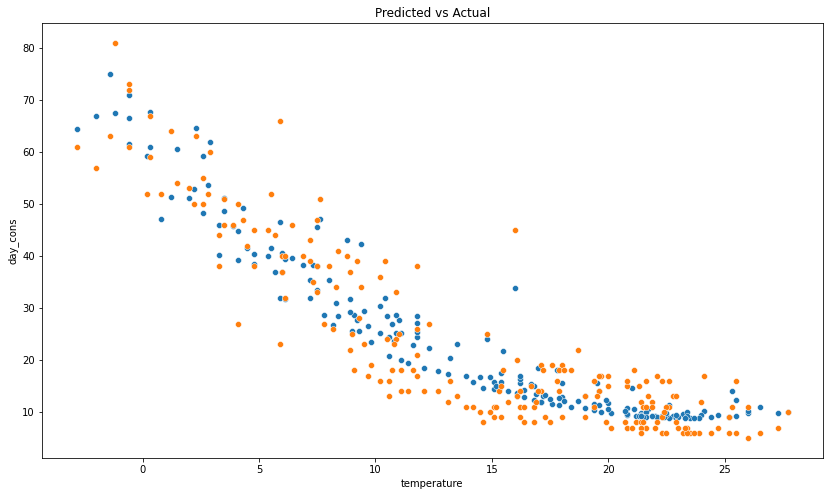

In [68]:
fig, ax = plt.subplots(figsize=(14,8))
sns.scatterplot(x=df["temperature"], y=y_all, ax=ax)
sns.scatterplot(x=df["temperature"],y=y,ax=ax)
plt.title("Predicted vs Actual")
plt.show()